In [1]:
import jieba
jieba.set_dictionary('dict.txt.big')
with open('stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 

import numpy as np

In [2]:
print(jieba.cut('下雨天留客天留我不留'))

<generator object Tokenizer.cut at 0x000002374A79F5C8>


In [3]:
print([t for t in jieba.cut('下雨天留客天留我不留')])
print([t for t in jieba.cut('下雨天留客天留我不留', cut_all=True)])
b=[t for t in jieba.cut('下雨天留客天留我不留')]
print(b[0])

Building prefix dict from F:\11.Courses\107(2)\NLP\Code\01.jieba\dict.txt.big ...
Loading model from cache C:\Users\yihlon\AppData\Local\Temp\jieba.u638d3c143c792b98ea11b3919c1b4aba.cache
Loading model cost 1.180 seconds.
Prefix dict has been built succesfully.


['下雨天', '留客', '天留', '我', '不留']
['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']
下雨天


In [4]:
count = 15
num = len(stops)//count
for i in range(num):
    print(", ".join(stops[i*num : (i+1)*num]))

﻿﻿,, , 、, 。, “, ”, 《, 》, ！, ，, ：, ；, ？, 人民, 末##末, 啊, 阿, 哎, 哎呀, 哎喲, 唉, 我, 我們, 按, 按照, 依照, 吧, 吧噠, 把, 罷了, 被, 本, 本著, 比, 比方, 比如, 鄙人, 彼, 彼此, 邊, 別, 別的, 別說, 並, 並且, 不比, 不成, 不單, 不但, 不獨, 不管, 不光, 不過, 不僅, 不拘, 不論, 不怕, 不然, 不如, 不特, 不惟, 不問, 不只, 朝, 朝著, 趁, 趁著, 乘, 沖, 除, 除此之外, 除非, 除了, 此, 此間, 此外, 從, 從而, 打, 待
但, 但是, 當, 當著, 到, 得, 的, 的話, 等, 等等, 地, 第, 叮咚, 對, 對於, 多, 多少, 而, 而況, 而且, 而是, 而外, 而言, 而已, 爾後, 反過來, 反過來說, 反之, 非但, 非徒, 否則, 嘎, 嘎登, 該, 趕, 個, 各, 各個, 各位, 各種, 各自, 給, 根據, 跟, 故, 故此, 固然, 關於, 管, 歸, 果然, 果真, 過, 哈, 哈哈, 呵, 和, 何, 何處, 何況, 何時, 嘿, 哼, 哼唷, 呼哧, 乎, 嘩, 還是, 還有, 換句話說, 換言之, 或, 或是, 或者, 極了, 及, 及其, 及至, 即, 即便
即或, 即令, 即若, 即使, 幾, 幾時, 己, 既, 既然, 既是, 繼而, 加之, 假如, 假若, 假使, 鑒於, 將, 較, 較之, 叫, 接著, 結果, 借, 緊接著, 進而, 盡, 儘管, 經, 經過, 就, 就是, 就是說, 據, 具體地說, 具體說來, 開始, 開外, 靠, 咳, 可, 可見, 可是, 可以, 況且, 啦, 來, 來著, 離, 例如, 哩, 連, 連同, 兩者, 了, 臨, 另, 另外, 另一方面, 論, 嘛, 嗎, 慢說, 漫說, 冒, 麼, 每, 每當, 們, 莫若, 某, 某個, 某些, 拿, 哪, 哪邊, 哪兒, 哪個, 哪裏, 哪年, 哪怕
哪天, 哪些, 哪樣, 那, 那邊, 那兒, 那個, 那會兒, 那裏, 那麼, 那麼些, 那麼樣, 那時, 那些, 那樣, 乃, 乃至, 呢, 能, 你, 你們, 您, 寧, 寧可, 寧肯, 寧願, 哦, 嘔, 啪達, 旁人, 呸, 憑, 憑藉, 其,

In [5]:
#encoding=utf-8 
import jieba 
import jieba.posseg as pseg 
jieba.set_dictionary("dict.txt.big") 
words = pseg.cut("颱風就是要泛⾈舟啊不然要幹嘛") 

for word, flag in words:     
    print('%s %s' % (word, flag))

Building prefix dict from F:\11.Courses\107(2)\NLP\Code\01.jieba\dict.txt.big ...
Loading model from cache C:\Users\yihlon\AppData\Local\Temp\jieba.u638d3c143c792b98ea11b3919c1b4aba.cache
Loading model cost 1.242 seconds.
Prefix dict has been built succesfully.


颱風 ns
就是 d
要泛 a
⾈ x
舟 n
啊 y
不然 c
要 v
幹嘛 n


In [22]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

testStr = """
前言
中文自然語言處理，與英文最大的差別就在斷詞，但是說實話，這個部分至今仍然沒有一個套件可以做好很好。目前而言，繁體中文有兩個套件可以使用，一個是中研院開發的斷詞系統，但是經過多方打聽，使用上並不是特別方便。因此我個人打選擇使用第二套系統jieba，中文叫做結巴，很幸運地這個套件有python的介面，使用上非常容易，只是這是大陸人開發的系統，必須自行輸入繁體字典，這篇文章的繁體字典出處在這邊。順帶一提，這篇文章寫得很好，對於jieba如果有想要有更深的認識，可以好好拜讀。
另外，由於這篇文章有使用到許多外部資源，所以若有需要巡長文章中出現的其他檔案，請參考這個repo

斷詞
結巴的斷詞分成兩個模式，精準模式只找到系統演算出最精準的斷詞可能，全斷詞模式則是把所有可能的斷詞模式列出來，如果你想要用來做文本分析，句子又沒有很長的的時候，建議你可以使用全斷詞模式，可以增加文跟文章之間的可比性，我曾經因為把斷詞模式改掉，在預測準確率上面就從96%變成99%，大家可以參考一下。

去除停用字
這個部分跟英文沒什麼差別啦，只是中文的停用字並沒有被內建在nltk當中，要自己找檔案，上面Import是我找到的檔案，大家覺得不夠好也可以自己再去找。不過因為實在太長的，我就不全部列出來了。

詞性標注
雖然jieba也有提供詞性標注功能，不過實在做得還不到能用的程度，實務上我也沒什麼在用，所以大家就先略過這個部分吧。

其他
由於這邊文章實在太短了，又有很大部分與昨天的文章重複，所以我們就拿上面我已經打好的文字來做分析吧。
"""

In [23]:
stops.append('\n')
stops.append('\n\n')
terms = [t for t in jieba.cut(testStr, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('斷', 9),
 ('文章', 7),
 ('使用', 6),
 ('模式', 6),
 ('詞', 5),
 ('中文', 4),
 ('部分', 4),
 ('系統', 4),
 ('詞模式', 4),
 ('套件', 3),
 ('好', 3),
 ('繁體', 3),
 ('jieba', 3),
 ('篇文章', 3),
 ('檔案', 3),
 ('做', 3),
 ('上面', 3),
 ('實在', 3),
 ('英文', 2),
 ('差別', 2),
 ('一個', 2),
 ('兩個', 2),
 ('以使', 2),
 ('開發', 2),
 ('結巴', 2),
 ('繁體字', 2),
 ('字典', 2),
 ('想要', 2),
 ('參考', 2),
 ('精準', 2),
 ('找到', 2),
 ('全', 2),
 ('列出', 2),
 ('列出來', 2),
 ('分析', 2),
 ('停用', 2),
 ('用字', 2),
 ('沒什麼', 2),
 ('找', 2),
 ('實在太', 2),
 ('詞性', 2),
 ('標', 2),
 ('注', 2),
 ('前言', 1),
 ('自然', 1),
 ('自然語言', 1),
 ('語言', 1),
 ('處理', 1),
 ('最大', 1),
 ('說實話', 1),
 ('實話', 1),
 ('分至', 1),
 ('至今', 1),
 ('一個套', 1),
 ('做好', 1),
 ('目前', 1),
 ('繁體中文', 1),
 ('中研', 1),
 ('中研院', 1),
 ('多方', 1),
 ('打聽', 1),
 ('特別', 1),
 ('方便', 1),
 ('選擇', 1),
 ('第二', 1),
 ('第二套', 1),
 ('二套', 1),
 ('叫做', 1),
 ('幸運', 1),
 ('幸運地', 1),
 ('python', 1),
 ('介面', 1),
 ('非常容易', 1),
 ('常容', 1),
 ('容易', 1),
 ('大陸', 1),
 ('人', 1),
 ('自行', 1),
 ('輸入', 1),
 ('出處', 1),
 ('處在', 1),
 ('順帶', 1),
 

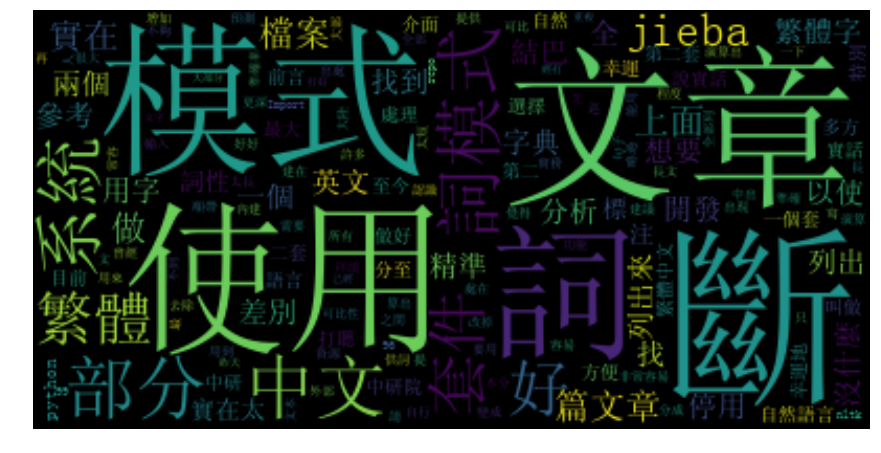

In [24]:
wordcloud = WordCloud(font_path="simsun.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

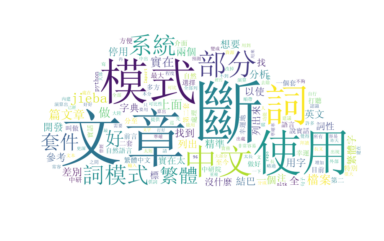

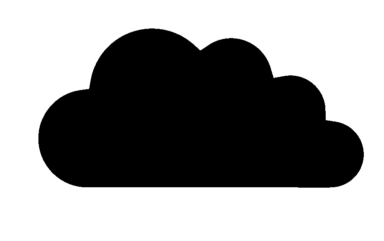

In [25]:
from PIL import Image

alice_mask = np.array(Image.open("cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path="simsun.ttf")
wc.generate_from_frequencies(Counter(terms))

# store to file
# wc.to_file(path.join(d, "cloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()